In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Tensorflow Utils
import tensorflow as tf
import tensorflow_hub as hub

**Loading** **Dataset** : Wine Reviews Dataset

**Source** : Kaggle
**Dataset** : Wine Reviews Dataset

**Link** : https://www.kaggle.com/zynicide/wine-reviews

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "winemag-data-130k-v2.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zynicide/wine-reviews",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


/tmp/ipython-input-1829331832.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [ ]:
# dataset overview
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
# Dataset columns
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [ ]:
# Removing Columns
# Description : Points (label)
df.drop(columns=["Unnamed: 0" ,'country' , 'designation' , 'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'] , inplace=True)

In [ ]:
df.head() , df.tail()

(                                         description  points
 0  Aromas include tropical fruit, broom, brimston...      87
 1  This is ripe and fruity, a wine that is smooth...      87
 2  Tart and snappy, the flavors of lime flesh and...      87
 3  Pineapple rind, lemon pith and orange blossom ...      87
 4  Much like the regular bottling from 2012, this...      87,
                                               description  points
 129966  Notes of honeysuckle and cantaloupe sweeten th...      90
 129967  Citation is given as much as a decade of bottl...      90
 129968  Well-drained gravel soil gives this wine its c...      90
 129969  A dry style of Pinot Gris, this is crisp with ...      90
 129970  Big, rich and off-dry, this is powered by inte...      90)

In [ ]:
# checking for null values
df.isna().sum()

,0
description,0
points,0


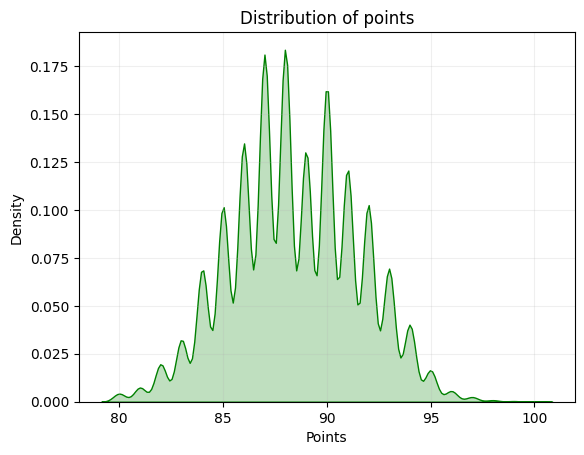

In [ ]:
# Plotting the points
sns.kdeplot(df["points"] , color = "green" , fill = True)
plt.title("Distribution of points")
plt.xlabel("Points")
plt.ylabel("Density")
plt.grid(alpha = 0.2)
plt.show()

In [ ]:
# new label column
df["quality"] = (df["points"] >= 90).astype(int)

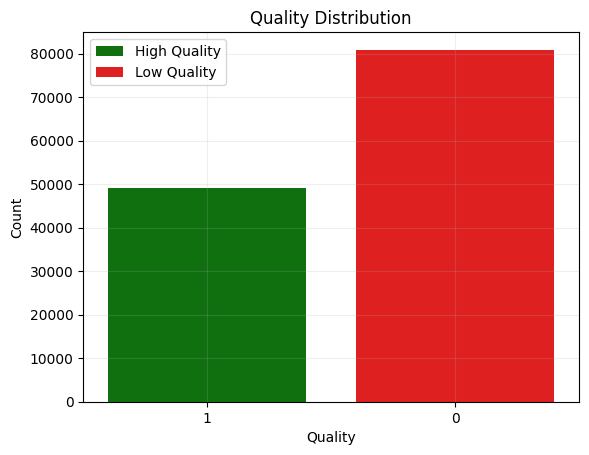

In [ ]:
# quality distribution
sns.countplot(x = df[df["quality"] == 1]["quality"] , color = "green" , label = "High Quality")
sns.countplot(x = df[df["quality"] == 0]["quality"] , color = "red" , label = "Low Quality")
plt.title("Quality Distribution")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.grid(alpha = 0.2)
plt.show()

In [ ]:
# description : quality

df = df[["description" , "quality"]]

In [ ]:
# split : train , valid  , test
# Train : 80% , Valid : 10% , Test : 10%
train , valid , test  = np.split(df.sample(frac = 1) , [int(0.8 * len(df)) , int(0.9 * len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def df_to_dataset():
  pass